# Unlocking Insights: 

## Building a Simple Linear Regression Machine Learning Model for CO2 Emission Analysis

---

# Project Overview:

## Introduction

In response to the growing imperative for sustainable practices in the automotive industry, the development of predictive models for carbon dioxide (CO2) emissions has become a pivotal focus. This document presents a comprehensive overview of a Machine Learning (ML) project aimed at predicting CO2 emissions from cars. The project leverages a **linear regression model**, utilizing the latest dataset sourced from the **Government of Canada.**

The core objective of this initiative is to create a tool that aids in **estimating the CO2 emissions of new cars**, with a specific emphasis on key factors influencing environmental impact—**engine size and the number of cylinders**. By employing advanced data analytics and machine learning techniques, this model not only addresses the immediate need for accurate emission predictions but also aligns with broader sustainability goals within the automotive sector.

This documentation serves as a transparent and detailed account of the entire machine learning project, from its conceptualization to the deployment of the predictive model. Through a structured approach encompassing problem definition, data collection, exploratory data analysis, modeling, and beyond, **this document provides insights into the decision-making processes, methodologies employed, and the model's performance.**

**The dataset, sourced directly from the Government of Canada**, ensures the incorporation of the latest and most relevant information, contributing to the model's accuracy and relevance in the context of contemporary automotive emissions standards. As we delve into the intricacies of the project, we aim to foster transparency, reproducibility, and collaboration, promoting a holistic understanding of the methodologies and outcomes achieved.

This initiative represents a step towards informed decision-making within the automotive industry, empowering stakeholders with a tool that aligns with environmental sustainability objectives. Through open documentation and shared knowledge, we hope to contribute to the collective efforts aimed at reducing the carbon footprint of vehicular emissions.

# Problem Definition

## Problem Statement

The automotive industry plays a significant role in contributing to environmental challenges, with carbon dioxide (CO2) emissions from vehicles being a primary concern. The problem at hand revolves around the need for a reliable and accurate method to predict CO2 emissions from new cars. As the industry undergoes rapid changes and strives to meet stringent environmental standards, having a robust predictive model becomes crucial for manufacturers, regulators, and consumers alike.

The primary challenge is to develop a machine learning model capable of estimating CO2 emissions with precision, considering key influencing factors. Engine size and the number of cylinders have been identified as pivotal parameters affecting emissions, necessitating a predictive tool that can analyze these variables and provide actionable insights. **The goal is to create a model that not only meets the immediate need for accurate predictions but also aligns with the broader sustainability objectives within the automotive sector.**



## Data Sources


Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

To help you compare vehicles from different model years, the fuel consumption ratings for 1995 to 2014 vehicles have been adjusted to reflect 5-cycle testing. Note that these are approximate values that were generated from the original ratings, not from vehicle testing.

For more information on fuel consumption testing, visit: (https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/fuel-consumption-guide/understanding-fuel-consumption-ratings/fuel-consumption-testing/21008.)

To compare the fuel consumption information of new and older models to find the most fuel-efficient vehicle that meets your everyday needs, use the fuel consumption ratings search tool at (https://fcr-ccc.nrcan-rncan.gc.ca/en.)

# Data Collection

## Data Description

The dataset contains information related to various vehicle models, including details about their make, model, vehicle class, engine specifications, transmission type, fuel type, fuel consumption metrics, and environmental attributes. 
Here's a breakdown of the key features:

1. **Year:**
   - The year in which the vehicle model is designated.

2. **Make:**
   - The brand or manufacturer of the vehicle.

3. **Model:**
   - The specific model designation of the vehicle.

4. **Vehicle Class:**
   - The classification of the vehicle, indicating its size or type (e.g., Full-size, SUV: Small, SUV: Standard).

5. **Engine Size (L):**
   - The size of the vehicle's engine, measured in liters.

6. **Cylinders:**
   - The number of cylinders in the vehicle's engine.

7. **Transmission:**
   - The type of transmission system used in the vehicle (e.g., AV7, AS10, M6).

8. **Fuel Type:**
   - The type of fuel used by the vehicle (e.g., Z).

9. **Fuel Consumption:**
   - - **City (L/100 km):**
        - The fuel consumption rate in liters per 100 kilometers during city driving.
     - **Hwy (L/100 km):**
        - The fuel consumption rate in liters per 100 kilometers during highway driving.
     - **Comb (L/100 km):**
        - The combined fuel consumption rate in liters per 100 kilometers (averaged city and highway).
     - **Comb (mpg):**
        - The combined fuel consumption rate in miles per gallon.

10. **CO2 Emissions:**
    - - **CO2 (g/km):**
        - The carbon dioxide emissions in grams per kilometer.
    - **CO2 Rating:**
        - The rating assigned to the vehicle based on its CO2 emissions.

11. **Smog Rating:**
    - The smog rating assigned to the vehicle.

The dataset appears to provide a detailed overview of vehicle characteristics, fuel efficiency, and environmental impact, making it suitable for analysis and modeling related to carbon emissions and fuel consumption.


# Exploratory Data Analysis (EDA)

### Importing Needed packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data in


In [29]:
#New menthod to use dataset from different folder 

file_path = r"/Users/shashankhp/Documents/My Folder/Projects ML/CO2 emissions ML model/CO2 emission Model ML Data set/MY2023 Fuel Consumption Ratings.csv"

#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 8635: invalid continuation byte
# if we use encoding = 'latin1' we dont get the UniCodeDecoderError


# Read the CSV file into a DataFrame
df = pd.read_csv(file_path,encoding='latin1')

df.head()
'''
# take a look at the dataset
df.head()

# Specify the columns you want to select
selected_columns = ['Model', 'Make']

# Create a new DataFrame with only the selected columns
selected_data = df[selected_columns]

# Display the selected data
print(selected_data)
'''


"\n# take a look at the dataset\ndf.head()\n\n# Specify the columns you want to select\nselected_columns = ['Model', 'Make']\n\n# Create a new DataFrame with only the selected columns\nselected_data = df[selected_columns]\n\n# Display the selected data\nprint(selected_data)\n"

**DtypeWarning:** Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
**df = pd.read_csv(file_path,encoding='latin1')**



The warning you're seeing indicates that Pandas has encountered columns with mixed types while reading the CSV file. This can happen when there are values in the columns that are not consistent with the overall data type expected for that column.

### To address this, you can try the following:

1. **Specify Data Types:** Explicitly specify the data types for each column using the `dtype` parameter in `read_csv`. For example, if column 0 is supposed to be numeric, you can specify it as follows:

    ```python
    df = pd.read_csv(file_path, encoding='latin1', dtype={'Column0': int})
    ```

   Replace `'Column0'` with the actual name of the column, and adjust the data type accordingly for other columns.

2. **Set `low_memory` to `False`:** The warning suggests setting `low_memory` to `False`. This option can be set to `False` to disable the warning. However, keep in mind that this may consume more memory.

    ```python
    df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
    ```

   If your dataset is not too large, setting `low_memory` to `False` might be a reasonable option.

3. **Investigate and Clean the Data:** Inspect the columns mentioned in the warning and identify any inconsistencies or unexpected values. Clean the data by addressing these issues.

For a more specific solution, you might want to share a snippet of your data or the problematic columns so that we can provide more targeted advice.


### Data Exploration
Let's first have a descriptive exploration on our data.


In [30]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2,Smog,...,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223
count,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2023.0,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023.0,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.5,4,7.2,167
1,1.5,4,7.4,172
2,1.5,4,7.8,181
3,3.5,6,11.2,263
4,3.0,6,12.4,291
5,2.0,4,9.9,232
6,2.0,4,10.3,242
7,2.0,4,9.8,230
8,2.0,4,9.8,231


### We can plot each of these features:



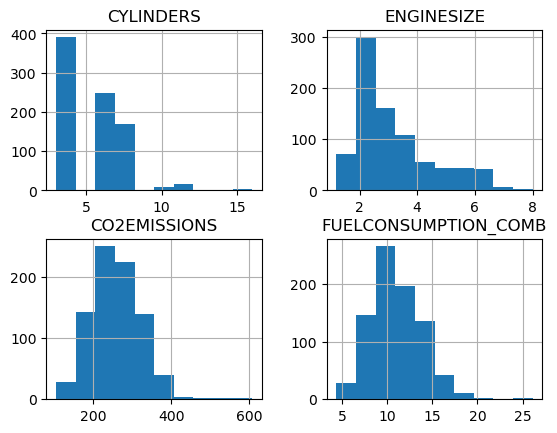

In [34]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

### Now, let's plot each of these features against the Emission, to see how linear their relationship is:


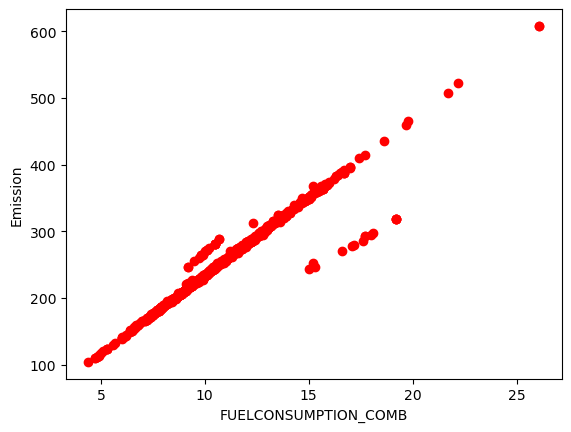

In [37]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

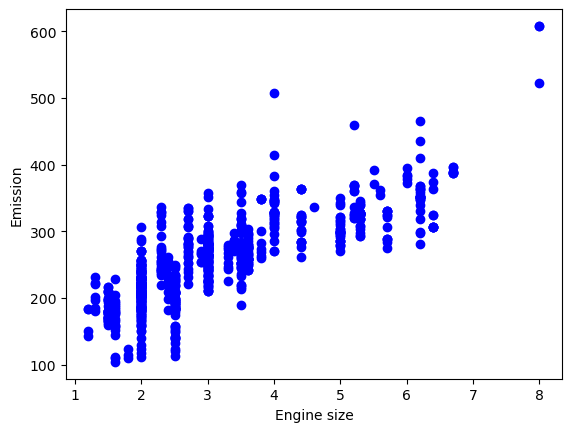

In [38]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

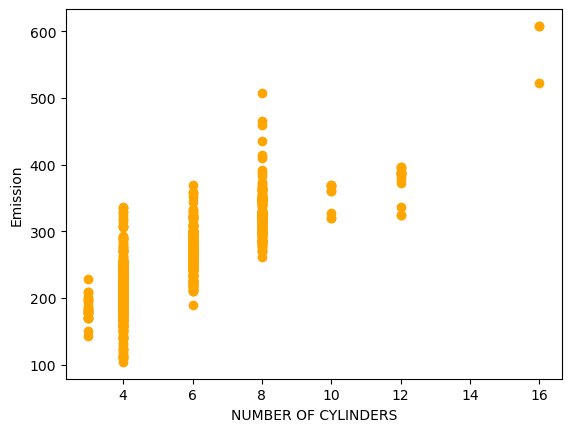

In [40]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='orange')
plt.xlabel("NUMBER OF CYLINDERS")
plt.ylabel("Emission")
plt.show()

## Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [41]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution 1


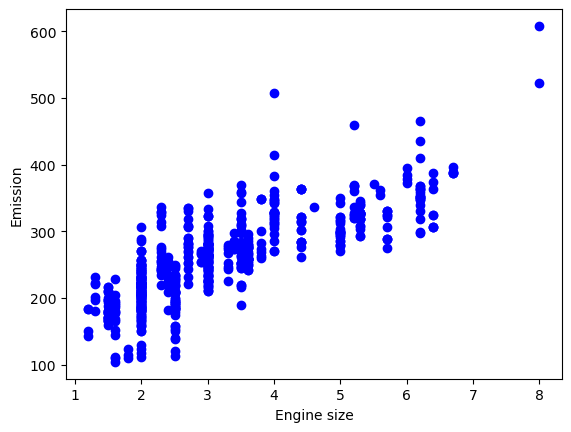

In [42]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Train data distribution 2


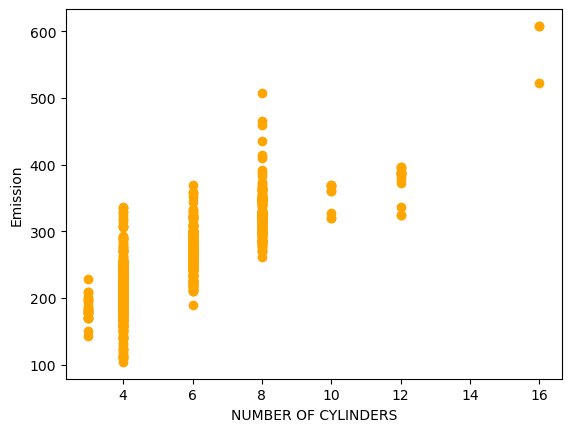

In [52]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='orange')
plt.xlabel("NUMBER OF CYLINDERS")
plt.ylabel("Emission")
plt.show()

## Modeling


### Using sklearn package to model data.


In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[37.62516771]]
Intercept:  [139.40677066]


In [53]:
regr2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[26.22941739]]
Intercept:  [110.11400005]


In [56]:
regr3 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr3.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Coefficients:  [[21.27537848]]
Intercept:  [22.32986815]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


### Plot outputs


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


Text(0, 0.5, 'Emission')

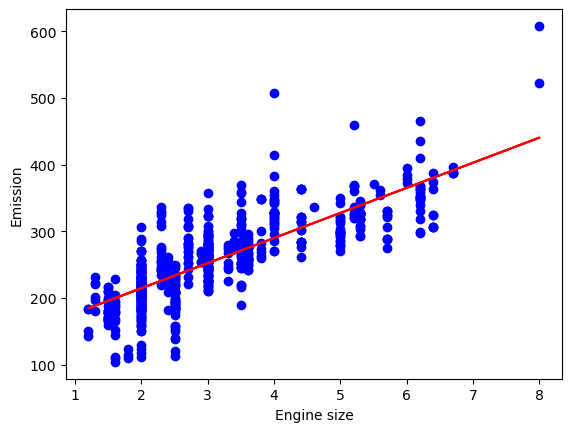

In [85]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
#print([train_x], [regr.coef_[0][0]*train_x + regr.intercept_[0]])

Text(0, 0.5, 'Emission')

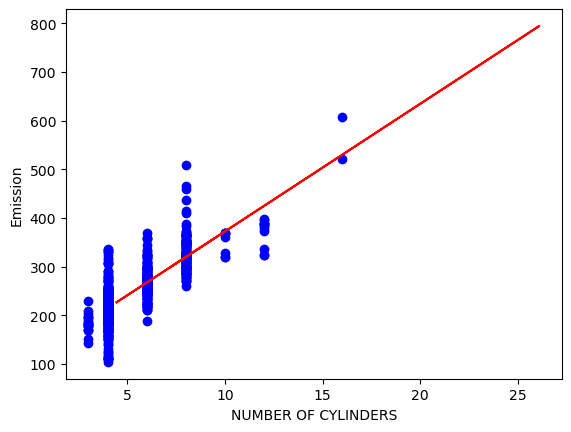

In [64]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr2.coef_[0][0]*train_x + regr2.intercept_[0], '-r')
plt.xlabel("NUMBER OF CYLINDERS")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

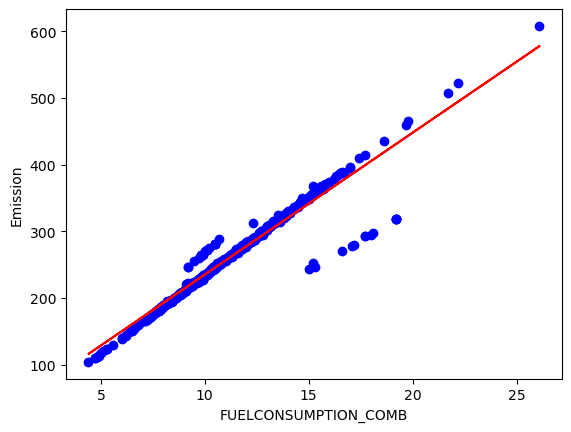

In [60]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr3.coef_[0][0]*train_x + regr3.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

**The line of code `plt.plot(train_x, regr2.coef_[0][0]*train_x + regr2.intercept_[0], '-r')` is using the Matplotlib library in Python to plot a linear regression line on a scatter plot.**

### Breakdown of Components:

- **`plt.plot`**: This function is used to plot lines and/or markers. In this case, it's used to plot a line.

- **`train_x`**: This is the x-axis data, typically representing the independent variable (features) in a linear regression model. It is assumed to be a NumPy array or a similar iterable.

- **`regr2.coef_[0][0]*train_x + regr2.intercept_[0]`**: This expression calculates the values for the y-axis based on the linear regression coefficients and intercept. `regr2.coef_[0][0]` is the slope (coefficient) of the linear regression, and `regr2.intercept_[0]` is the y-intercept. The formula for a simple linear regression line is `y = mx + b`, where `m` is the slope and `b` is the y-intercept.

- **`'-r'`**: This specifies the style of the line. Here, `'-'` indicates a solid line, and `'r'` indicates the color red. So, `'-r'` means a solid red line.

Putting it all together, this line of code is plotting a linear regression line on a scatter plot with a red color. The line is determined by the coefficients and intercept obtained from the linear regression model (`regr2`). This visualization helps you see how well the linear regression model fits the training data points.


## Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [46]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 30.52
Residual sum of squares (MSE): 1589.92
R2-score: 0.63


### Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [47]:
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]

Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [48]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Find the predictions using the model's `predict` function and the `test_x` data


In [49]:
predictions = regr.predict(test_x)

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [50]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 5.74


We can see that the MAE is much better when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


# To Find CO2 emissions for new cars

In [93]:
ECC = float(input("Enter the Engine size : " ))
XEM =  regr.coef_[0][0] * ECC + regr.intercept_[0]
print("The respose variable is (Ycap) = %.2f"  % XEM)

#regr.coef_[0][0]*train_x + regr.intercept_[0]



Enter the Engine size : 3
The respose variable is (Ycap) = 252.28
